In [58]:
#importing all the necessary lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from scipy import stats
warnings.filterwarnings("ignore")

In [128]:
df = pd.read_csv (r'D:\DataTrained\HOUSING\Project-Housing_splitted\train.csv')
df_test = pd.read_csv (r'D:\DataTrained\HOUSING\Project-Housing_splitted\test.csv')

df_train = pd.DataFrame(df)
df_test = pd.DataFrame(df_test)

In [133]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

#### from the obove info we can split the data into two types categorical and numerical. 81 columns from which 43 are categorical and 38 is numerical


In [5]:
numeric_data = df_train.select_dtypes(include=[np.number])
categorical_data = df_train.select_dtypes(exclude=[np.number])



In [6]:
numeric_data = numeric_data.drop(columns=['Id'])
numeric_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,120,NaN,4928,6,5,1976,1976,0.0,120,0,...,0,205,0,0,0,0,0,2,2007,128000
1,20,95.0,15865,8,6,1970,1970,0.0,351,823,...,81,207,0,0,224,0,0,10,2007,268000
2,60,92.0,9920,7,5,1996,1997,0.0,862,0,...,180,130,0,0,0,0,0,6,2007,269790
3,20,105.0,11751,6,6,1977,1977,480.0,705,0,...,0,122,0,0,0,0,0,1,2010,190000
4,20,NaN,16635,6,7,1977,2000,126.0,1246,0,...,240,0,0,0,0,0,0,6,2009,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,20,NaN,9819,5,5,1967,1967,31.0,450,0,...,0,0,0,0,0,0,0,2,2010,122000
1164,20,67.0,8777,4,5,1949,2003,0.0,0,0,...,0,96,0,0,0,0,0,5,2009,108000
1165,160,24.0,2280,6,6,1976,1976,0.0,566,0,...,87,0,0,0,0,0,0,7,2009,148500
1166,70,50.0,8500,4,4,1920,1950,0.0,0,0,...,0,54,172,0,0,0,0,7,2008,40000


In [7]:
numeric_data.isnull().sum()


MSSubClass         0
LotFrontage      214
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         7
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       64
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [8]:
numeric_data.shape

(1168, 37)

In [21]:
## Target Feature extract and see distrubution and probability

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

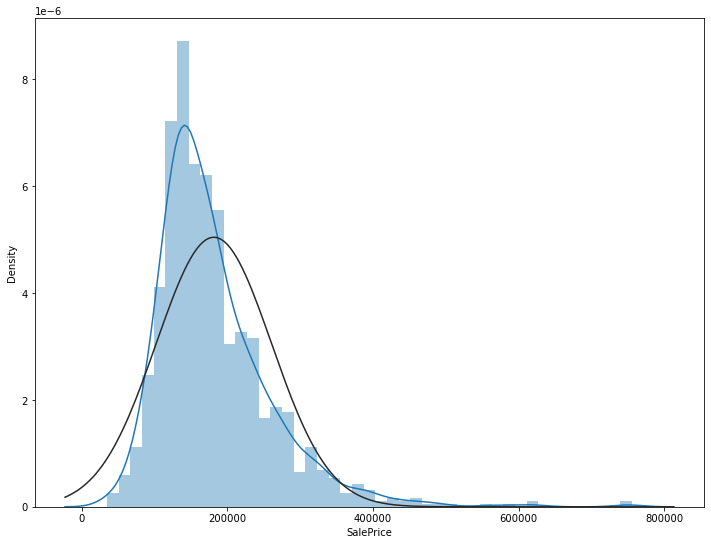

In [18]:
Target_y = numeric_data['SalePrice']

plt.subplots(figsize=(12,9))
sns.distplot(Target_y, fit=stats.norm)

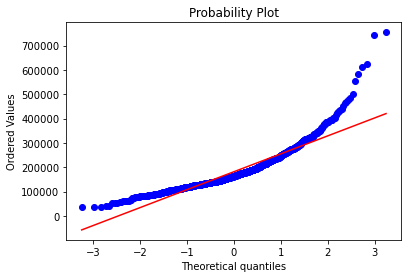

In [20]:
fig = plt.figure()
stats.probplot(Target_y, plot=plt)
plt.show()

In [23]:
## to see corelation between variables using heat maps and extract higest values variables

#### two attributes have more null values are LotFrontage and garage yr built and since it's

In [9]:

corr = numeric_data.corr()
corr.shape

(37, 37)

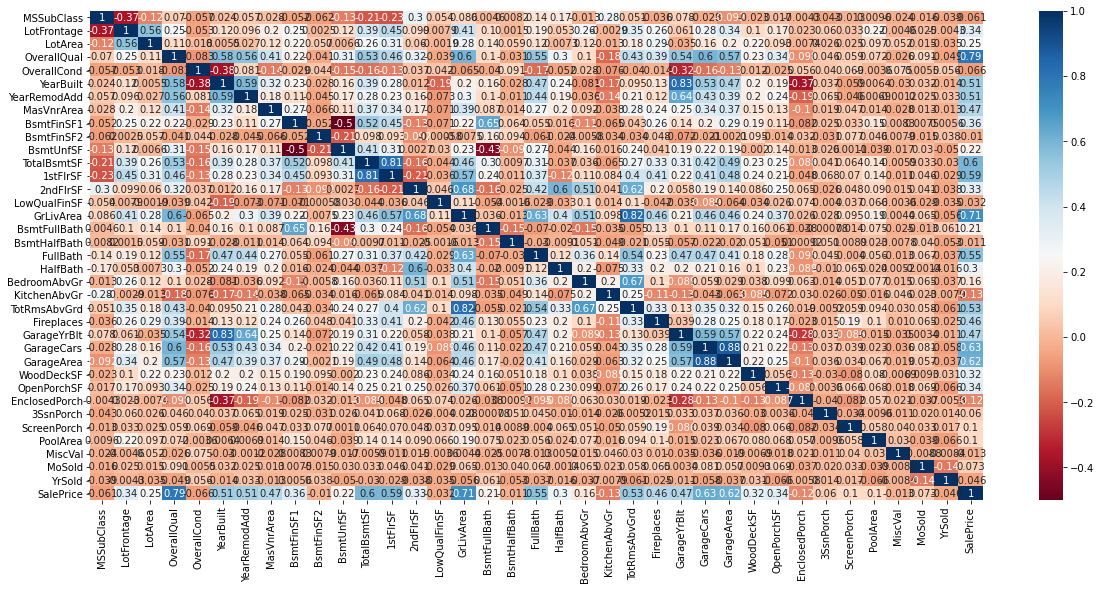

In [13]:
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True , cmap="RdBu")
plt.show()

In [ ]:
# extract all the vaiables with correaltion grater than 0.5 and plot a heat map

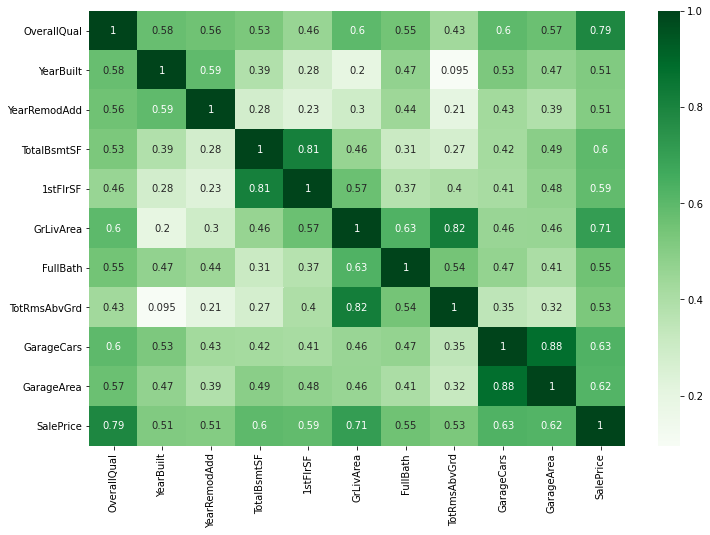

In [24]:
top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = numeric_data[top_feature].corr()
sns.heatmap(top_corr, annot=True , cmap='Greens')
plt.show()

In [ ]:
# from above overallQual has highes corelation with sale price(target feature)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

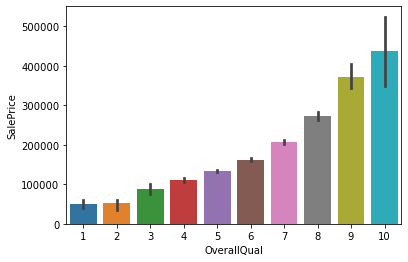

In [28]:
sns.barplot(numeric_data.OverallQual, numeric_data.SalePrice)


In [32]:
len(top_feature)

11

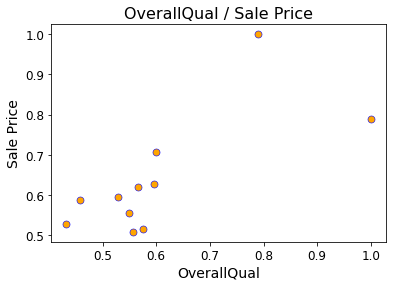

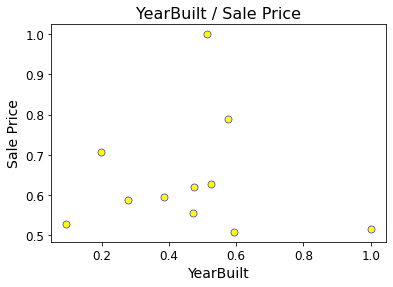

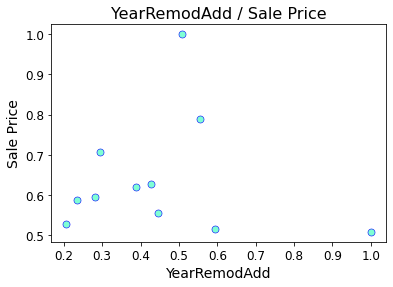

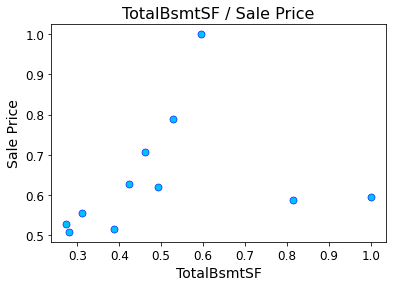

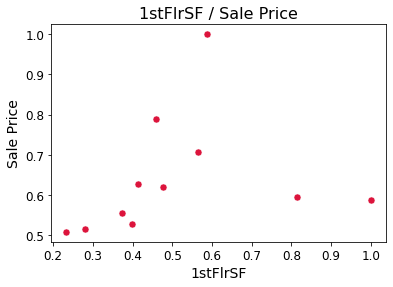

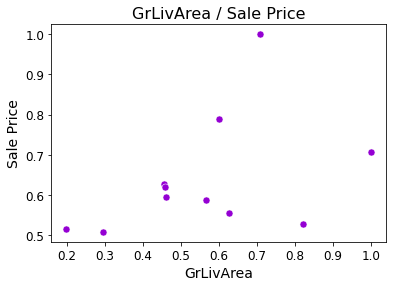

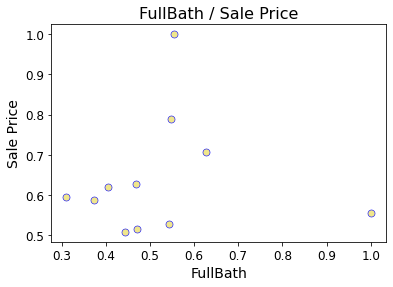

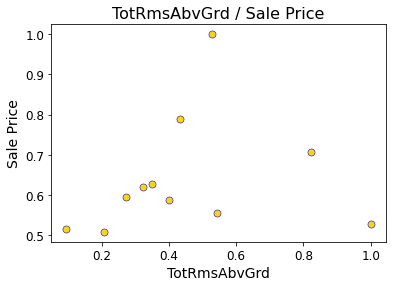

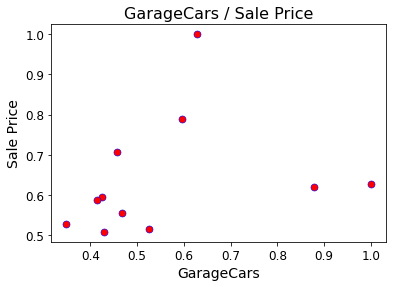

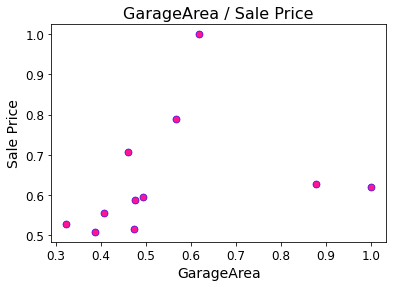

In [63]:
def scatter_df(y_var):
    scatter_df = top_corr.drop(y_var, axis = 1)
    i = top_corr.columns
    
    plot1 = sns.scatterplot(i[0], y_var, data = top_corr, color = 'orange', edgecolor = 'b', s = 50)
    plt.title('{} / Sale Price'.format(i[0]), fontsize = 16)
    plt.xlabel('{}'.format(i[0]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.show()
    
    plot2 = sns.scatterplot(i[1], y_var, data = top_corr, color = 'yellow', edgecolor = 'b', s = 50)
    plt.title('{} / Sale Price'.format(i[1]), fontsize = 16)
    plt.xlabel('{}'.format(i[1]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.show()
    
    plot3 = sns.scatterplot(i[2], y_var, data = top_corr, color = 'aquamarine', edgecolor = 'b', s = 50)
    plt.title('{} / Sale Price'.format(i[2]), fontsize = 16)
    plt.xlabel('{}'.format(i[2]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.show()
    
    plot4 = sns.scatterplot(i[3], y_var, data = top_corr, color = 'deepskyblue', edgecolor = 'b', s = 50)
    plt.title('{} / Sale Price'.format(i[3]), fontsize = 16)
    plt.xlabel('{}'.format(i[3]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.show()
    
    plot5 = sns.scatterplot(i[4], y_var, data = top_corr, color = 'crimson', edgecolor = 'white', s = 50)
    plt.title('{} / Sale Price'.format(i[4]), fontsize = 16)
    plt.xlabel('{}'.format(i[4]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.show()
    
    plot6 = sns.scatterplot(i[5], y_var, data = top_corr, color = 'darkviolet', edgecolor = 'white', s = 50)
    plt.title('{} / Sale Price'.format(i[5]), fontsize = 16)
    plt.xlabel('{}'.format(i[5]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.show()
    
    plot7 = sns.scatterplot(i[6], y_var, data = top_corr, color = 'khaki', edgecolor = 'b', s = 50)
    plt.title('{} / Sale Price'.format(i[6]), fontsize = 16)
    plt.xlabel('{}'.format(i[6]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.show()
    
    plot8 = sns.scatterplot(i[7], y_var, data = top_corr, color = 'gold', edgecolor = 'b', s = 50)
    plt.title('{} / Sale Price'.format(i[7]), fontsize = 16)
    plt.xlabel('{}'.format(i[7]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.show()
    
    plot9 = sns.scatterplot(i[8], y_var, data = top_corr, color = 'r', edgecolor = 'b', s = 50)
    plt.title('{} / Sale Price'.format(i[8]), fontsize = 16)
    plt.xlabel('{}'.format(i[8]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.show()
    
    plot10 = sns.scatterplot(i[9], y_var, data = top_corr, color = 'deeppink', edgecolor = 'b', s = 50)
    plt.title('{} / Sale Price'.format(i[9]), fontsize = 16)
    plt.xlabel('{}'.format(i[9]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.show()
    
scatter_df('SalePrice')

In [47]:
categorical_data
categorical_data.shape
#sns.barplot(numeric_data.OverallQual, numeric_data.SalePrice)

(1168, 41)

In [53]:
categorical_data.isnull().sum()

MSZoning           0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         7
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinType2      31
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
KitchenQual        0
Functional         0
FireplaceQu      551
GarageType        64
GarageFinish      64
GarageQual        64
GarageCond        64
PavedDrive         0
Fence            931
SaleType           0
SaleCondition      0
dtype: int64

In [55]:
# removed columns with more tahn 50% missing data
categorical_data

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,COD,Normal
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,...,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Normal
1164,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,...,SBrkr,Gd,Typ,Detchd,Fin,TA,TA,N,WD,Normal
1165,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,NPkVill,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
1166,C (all),Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,...,SBrkr,TA,Typ,Detchd,Unf,TA,Fa,N,WD,Normal


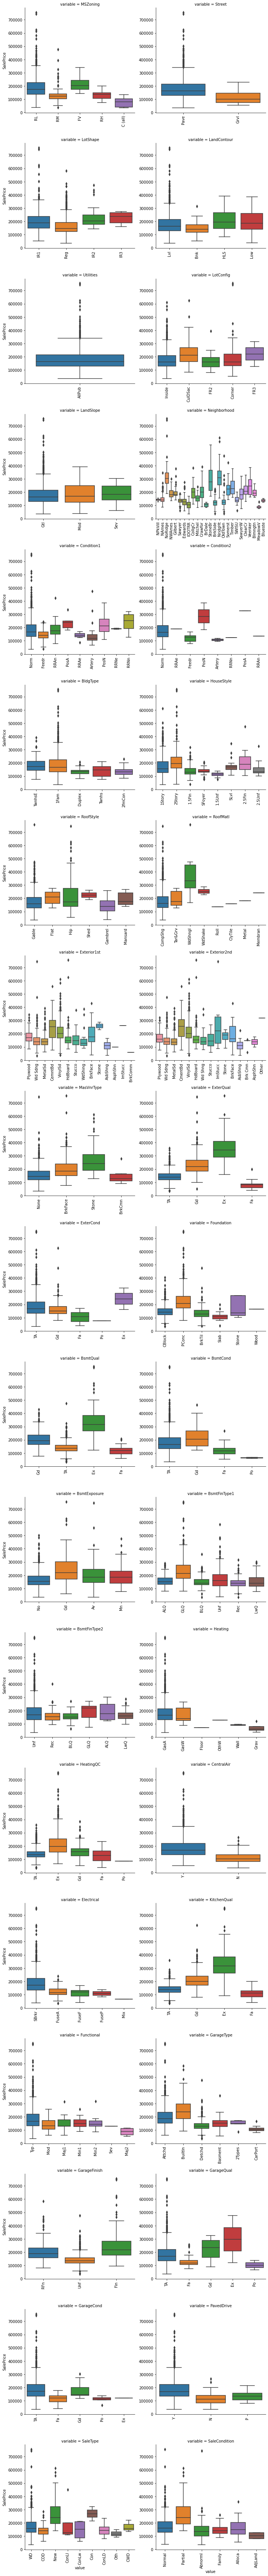

In [68]:
qualitative = categorical_data.columns

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(df, id_vars=['SalePrice'], value_vars=qualitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

In [69]:
# preparing data

In [95]:
median = numeric_data["LotFrontage"].median()
numeric_data["LotFrontage"].fillna(median, inplace=True)
numeric_data["GarageYrBlt"] = numeric_data["GarageYrBlt"].fillna(int(0))

numeric_data["MasVnrArea"] = numeric_data["MasVnrArea"].fillna(int(0))
numeric_data.drop('SalePrice', axis=1)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,120,70.0,4928,6,5,1976,1976,0.0,120,0,...,440,0,205,0,0,0,0,0,2,2007
1,20,95.0,15865,8,6,1970,1970,0.0,351,823,...,621,81,207,0,0,224,0,0,10,2007
2,60,92.0,9920,7,5,1996,1997,0.0,862,0,...,455,180,130,0,0,0,0,0,6,2007
3,20,105.0,11751,6,6,1977,1977,480.0,705,0,...,546,0,122,0,0,0,0,0,1,2010
4,20,70.0,16635,6,7,1977,2000,126.0,1246,0,...,529,240,0,0,0,0,0,0,6,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,20,70.0,9819,5,5,1967,1967,31.0,450,0,...,280,0,0,0,0,0,0,0,2,2010
1164,20,67.0,8777,4,5,1949,2003,0.0,0,0,...,520,0,96,0,0,0,0,0,5,2009
1165,160,24.0,2280,6,6,1976,1976,0.0,566,0,...,440,87,0,0,0,0,0,0,7,2009
1166,70,50.0,8500,4,4,1920,1950,0.0,0,0,...,250,0,54,172,0,0,0,0,7,2008


In [96]:

numeric_data.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [81]:
# training the model

In [151]:
#Take their values in X and y
X = numeric_data.values
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Target_y, test_size = 0.3, random_state = 7)

In [152]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)


LinearRegression()

In [153]:
y_pred = lm.predict(X_test)


In [154]:
print("score", lm.score(X_test, y_test)*100)


score 100.0


In [ ]:
#........................................................end.......

In [ ]:
#testing

In [137]:
numeric_data_test = df_test.select_dtypes(include=[np.number])
numeric_data_test

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold
0,337,20,86.0,14157,9,5,2005,2006,200.0,1249,...,178,51,0,0,0,0,NaN,0,7,2007
1,1018,120,NaN,5814,8,5,1984,1984,0.0,1036,...,63,0,0,0,0,0,NaN,0,8,2009
2,929,20,NaN,11838,8,5,2001,2001,0.0,0,...,202,151,0,0,0,0,NaN,0,6,2009
3,1148,70,75.0,12000,7,7,1941,1950,0.0,275,...,0,0,0,0,0,0,NaN,0,7,2009
4,1227,60,86.0,14598,6,5,2007,2007,74.0,0,...,100,18,0,0,0,0,NaN,0,1,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,78.0,10206,8,5,2007,2007,468.0,33,...,144,99,0,0,0,0,NaN,0,10,2008
288,1048,20,57.0,9245,5,5,1994,1995,0.0,686,...,0,0,0,0,0,0,NaN,0,2,2008
289,17,20,NaN,11241,6,7,1970,1970,180.0,578,...,0,0,0,0,0,0,NaN,700,3,2010
290,523,50,50.0,5000,6,7,1947,1950,0.0,399,...,0,24,36,0,0,0,NaN,0,10,2006


In [148]:
#numeric_data_test = numeric_data_test.drop(columns=['Id'])
X_test = numeric_data_test.values


In [ ]:
y_test
print("Accuracy --> ", lm.score(X_test, y_test)*100)
